# Stage 3 - Entity Mathcing 

In [1]:
from collections import Counter
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import py_entitymatching as em

IS_DEVELOPING = False

data_dir = './dataset/structured_data/'
A_filename = 'forbes_sample.csv' if IS_DEVELOPING else 'forbes_all.csv'
B_filename = 'nasdaq_sample.csv' if IS_DEVELOPING else 'nasdaq.csv'
blocked_filename = 'blocked_sample.csv' if IS_DEVELOPING else 'blocked.csv'



## 2 Blocking

In [2]:
A = pd.read_csv(data_dir + A_filename , encoding = "ISO-8859-1")
B = pd.read_csv(data_dir + B_filename , encoding = "ISO-8859-1")

In [39]:
A = A.rename(columns={'Company':'Name', 'Market Value (M)':'MarketValue', 'Profits (M)':'Profits' ,'Sales (M)':'Sales', 'Assets (M)':'Assets'})
B = B.rename(columns={'industry':'Industry', 'MarketCap':'MarketValue'})
em.set_key(A, 'id')
em.set_key(B, 'id')
A.to_csv(data_dir +"forbes_all_rename.csv")
B.to_csv(data_dir +"nasdaq_rename.csv")

In [4]:
A
all_fields_A = ['Name', 'Country' , 'Industry', 'Sales', 'Profits', 'Assets', 'MarketValue', 'Employee']
all_fields_A = ['Country' , 'Industry', 'MarketValue', 'Name' ]

In [5]:
B
all_fields_B = ['Symbol', 'Name', 'Country' , 'Sector' , 'Industry', 'LastSale', 'MarketValue']
all_fields_B = ['Name', 'Country' , 'Sector' , 'Industry','MarketValue']

### 2.1 Overlap blocker to initial the blocks.

Using overlap blocker. 
1. We first tokenize the names then use overlap size of 1 to block candidates.
2. After the first attemp, we found there are some common stop words can be useful to eliminate impossible pairs, then we added these common stop words into the block. eg., of, property, gas, oil.

The number of pairs after this first step is 40,908.


In [6]:
ob = em.OverlapBlocker()

Rule out common words.

In [7]:
ob.stop_words.extend(w.lower() for w in [
    'of',
    'property', 'holdings', 'holding', 'inc', 'bancorp', 'Bancorporation', 'plc',
    'Corporation', 'Corp', 'Group', 'Company',
    'Advanced',
    'Insurance', 'Bank', 'Financial', 'Pharmaceuticals', 'Pharma', 'Therapeutics',
    'Systems', 'Technologies', 'Technology', 'Express', 'Air', 'Securities', 'Security'
    'Mining', 'Energy', 'Electric', 'Gas', 'Oil', 'Power'])
ob.stop_words = list(set(ob.stop_words))
print(*ob.stop_words, sep=', ')

for, in, oil, it, holding, was, property, is, of, he, electric, bank, an, therapeutics, corporation, on, energy, by, company, will, has, gas, were, bancorp, technology, insurance, financial, pharmaceuticals, air, and, advanced, pharma, the, as, are, to, plc, corp, express, be, at, group, its, systems, inc, from, securitymining, with, a, securities, that, power, bancorporation, holdings, technologies


In [8]:
## jz: not yet sure how to combine multiple occurrence of same companies, e.g. "Zions Bancorp" vs "Zions Bancorp."
# AA = ob.block_tables(A, A, 'Name', 'Name', word_level=True, overlap_size=1, rem_stop_words=True,
#                     l_output_attrs=all_fields, 
#                     r_output_attrs=all_fields,
#                     show_progress=False)
# print(len(AA))
# AA.head()

In [9]:
# Specify the tokenization to be 'word' level and set overlap_size to be 3.
block_overlap = ob.block_tables(A, B, 'Name', 'Name', word_level=True, overlap_size=1, rem_stop_words=True,
                    l_output_attrs=all_fields_A,
                    r_output_attrs=all_fields_B,
                    show_progress=False)
print('# pairs:', len(block_overlap))
# Display first 5 tuple pairs in the candidate set.
block_overlap.head(300)

# pairs: 40908


,_id,ltable_id,rtable_id,ltable_Country,ltable_Industry,ltable_MarketValue,ltable_Name,rtable_Name,rtable_Country,rtable_Sector,rtable_Industry,rtable_MarketValue
0,0,3073,3,United States,Utilities: Gas and Electric,8343,Pinnacle West Capital,180 Degree Capital Corp.,United States,Finance,Finance/Investors Services,44.811103
1,1,260,3,Thailand,Banks,1300,Thanachart Capital,180 Degree Capital Corp.,United States,Finance,Finance/Investors Services,44.811103
2,2,2533,3,Bermuda,Property & Casualty Insurance,8600,Arch Capital Group,180 Degree Capital Corp.,United States,Finance,Finance/Investors Services,44.811103
3,3,1164,3,United States,Diversified Financials,-,Capital Group Cos,180 Degree Capital Corp.,United States,Finance,Finance/Investors Services,44.811103
4,4,388,3,JAPAN,-,298,M&A Capital Partners,180 Degree Capital Corp.,United States,Finance,Finance/Investors Services,44.811103
5,5,334,3,Hong Kong,-,537,Emperor Capital Group,180 Degree Capital Corp.,United States,Finance,Finance/Investors Services,44.811103
6,6,2579,3,United States,Real Estate,6200,American Capital Agency,180 Degree Capital Corp.,United States,Finance,Finance/Investors Services,44.811103
7,7,228,3,Malaysia,Banks,4900,RHB Capital,180 Degree Capital Corp.,United States,Finance,Finance/Investors Services,44.811103
8,8,2581,3,United States,Real Estate,9500,Annaly Capital Management,180 Degree Capital Corp.,United States,Finance,Finance/Investors Services,44.811103
9,9,1080,3,United States,Consumer Financial Services,39200,Capital One Financial,180 Degree Capital Corp.,United States,Finance,Finance/Investors Services,44.811103


In [10]:
# try out blocker over a single pair
# ob.block_tuples(A.ix[60], B.ix[0], l_overlap_attr='Name', r_overlap_attr='Name',
#                rem_stop_words=True, word_level=True, overlap_size=1)

### 2.2 Equivalence attribute blocker

We applied equivalence blocker on the previous overlap blocker results using same country name. This further cut down the number of pairs to 22,721.

In [11]:
## debug and improve the blocker
## This may take some trial and run...
## Block on the same country
cb = em.AttrEquivalenceBlocker()
block_country = cb.block_candset(block_overlap, 'Country', 'Country')
print('# pairs:', len(block_country))

0%                          100%
[##############################] | ETA: 00:00:01 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00

# pairs: 22721



Total time elapsed: 00:00:00


In [12]:
block_country.head()

,_id,ltable_id,rtable_id,ltable_Country,ltable_Industry,ltable_MarketValue,ltable_Name,rtable_Name,rtable_Country,rtable_Sector,rtable_Industry,rtable_MarketValue
0,0,3073,3,United States,Utilities: Gas and Electric,8343,Pinnacle West Capital,180 Degree Capital Corp.,United States,Finance,Finance/Investors Services,44.811103
3,3,1164,3,United States,Diversified Financials,-,Capital Group Cos,180 Degree Capital Corp.,United States,Finance,Finance/Investors Services,44.811103
6,6,2579,3,United States,Real Estate,6200,American Capital Agency,180 Degree Capital Corp.,United States,Finance,Finance/Investors Services,44.811103
8,8,2581,3,United States,Real Estate,9500,Annaly Capital Management,180 Degree Capital Corp.,United States,Finance,Finance/Investors Services,44.811103
9,9,1080,3,United States,Consumer Financial Services,39200,Capital One Financial,180 Degree Capital Corp.,United States,Finance,Finance/Investors Services,44.811103


### 2.3 Hashing blocker

The following step we applied hashing blocker to the company names:

1. If the first word in the company name is some common key words, eg. China, First, United, then we compare the second word.
2. If the first word is not in the kw list, we just compare the first and second letters in the first words from the two candidates.

After this step, we have number of candiate pairs to be 2,054.

In [13]:
## Hash Blocker
def hash_blocker(ltuple, rtuple):
    kw = ['China', 'American','United','First']
    # NOTE
    # some companies started with these common keywords, thus to do hashing more efficiently, we compare the second word.
    
    l_sp = ltuple['Name'].split()
    r_sp = rtuple['Name'].split()
    if l_sp[0] in kw or r_sp[0] in kw:
        if l_sp[0] == r_sp[0]:
            if  l_sp[1][0:2] != r_sp[1][0:2]:
                return True
            else:
                return False
        else:
            return True
    elif ltuple['Name'][0:2] != rtuple['Name'][0:2]:
        #print (ltuple['Name'][0],rtuple['Name'][0])
        return True
    else:
        return False
def hash_all (ltuple,rtuple):
    return False

In [14]:
hb = em.BlackBoxBlocker()
hb.set_black_box_function(hash_blocker)

In [15]:
block_hash = hb.block_candset(block_country)
print('# pairs:', len(block_hash))
block_hash.head(30)

0%                          100%
[##############################] | ETA: 00:00:04 | ETA: 00:00:03 | ETA: 00:00:02 | ETA: 00:00:02 | ETA: 00:00:02 | ETA: 00:00:02 | ETA: 00:00:02 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00

# pairs: 2054



Total time elapsed: 00:00:02


,_id,ltable_id,rtable_id,ltable_Country,ltable_Industry,ltable_MarketValue,ltable_Name,rtable_Name,rtable_Country,rtable_Sector,rtable_Industry,rtable_MarketValue
16,16,925,10,United States,Conglomerates,102200,3M,3M Company,United States,Health Care,Medical/Dental Instruments,114338.201700
30,30,2217,15,United States,Miscellaneous,139,A-Mark Precious Metals,"A-Mark Precious Metals, Inc.",United States,Basic Industries,Other Specialty Stores,120.659682
34,34,829,16,United States,Chemicals,798,A. Schulman,"A. Schulman, Inc.",United States,Basic Industries,Major Chemicals,926.471932
39,39,2464,23,United States,Pharmaceuticals,64900,Abbott Laboratories,Abbott Laboratories,United States,Health Care,Major Pharmaceuticals,76740.373240
40,40,2465,24,United States,Pharmaceuticals,99400,AbbVie,AbbVie Inc.,United States,Health Care,Major Pharmaceuticals,103837.460200
41,41,2842,26,United States,Specialty Retailers: Apparel,2132,Abercrombie & Fitch,Abercrombie & Fitch Company,United States,Consumer Services,Clothing/Shoe/Accessory Stores,811.066788
227,227,1254,38,United States,Diversified Outsourcing Services,1812,ABM Industries,ABM Industries Incorporated,United States,Finance,Diversified Commercial Services,2427.457948
328,328,1408,48,United States,"Electronics, Electrical Equip.",9553,Acuity Brands,Acco Brands Corporation,United States,Consumer Durables,Publishing,1440.067020
433,433,2576,62,United States,Recreational Products,25500,Activision Blizzard,"Activision Blizzard, Inc",United States,Technology,Computer Software: Prepackaged Software,37487.089330
443,443,1408,65,United States,"Electronics, Electrical Equip.",9553,Acuity Brands,Acuity Brands Inc,United States,Consumer Durables,Building Products,8994.894480


### 2.4 Debug the blocker results.

We used the debug_blocker function to generate the 200 most likely matched pairs from the eliminated pairs, and the results are printed below. As we examined, most of them are different entities. This means we have reasonable blocking results. And most of the eliminated pairs are not likely to be matching pairs.

In [16]:
corres = [('Name', 'Name'), ('Country', 'Country'),('Industry','Industry')]
dbg = em.debug_blocker(block_hash,A,B)
dbg


,_id,similarity,ltable_id,rtable_id,ltable_Name,ltable_Country,ltable_Industry,ltable_MarketValue,rtable_Name,rtable_Country,rtable_Industry,rtable_MarketValue
0,0,0.500000,1087,3137,Jaccs,Japan,Consumer Financial Services,678,Ocwen Financial Corporation,United States,Finance: Consumer Services,678.215235
1,1,0.500000,2614,3802,General Growth Properties,United States,Real Estate,25200,Seritage Growth Properties,United States,Real Estate,2413.183728
2,2,0.461538,2326,1105,Oil & Gas Development,Pakistan,Oil & Gas Operations,4900,Contango Oil & Gas Company,United States,Oil & Gas Production,184.791072
3,3,0.461538,2326,713,Oil & Gas Development,Pakistan,Oil & Gas Operations,4900,Cabot Oil & Gas Corporation,United States,Oil & Gas Production,11130.625570
4,4,0.461538,2327,4703,Oil & Natural Gas,India,Oil & Gas Operations,27800,Zion Oil & Gas Inc,United States,Oil & Gas Production,55.468834
5,5,0.461538,2326,4703,Oil & Gas Development,Pakistan,Oil & Gas Operations,4900,Zion Oil & Gas Inc,United States,Oil & Gas Production,55.468834
6,6,0.461538,2327,1105,Oil & Natural Gas,India,Oil & Gas Operations,27800,Contango Oil & Gas Company,United States,Oil & Gas Production,184.791072
7,7,0.461538,2327,713,Oil & Natural Gas,India,Oil & Gas Operations,27800,Cabot Oil & Gas Corporation,United States,Oil & Gas Production,11130.625570
8,8,0.461538,2326,3735,Oil & Gas Development,Pakistan,Oil & Gas Operations,4900,Samson Oil & Gas Limited,United States,Oil & Gas Production,9.216630
9,9,0.461538,2327,3735,Oil & Natural Gas,India,Oil & Gas Operations,27800,Samson Oil & Gas Limited,United States,Oil & Gas Production,9.216630


### 2.5 Generat 300 samples from the final blocking results.

We generated 5 small samples sets with about 50 pairs in each. After screening these small samples sets, we found reasonable number of matching pairs in each sample set. Thus, we used these final blocking results to generate 300 samples to label and then used as the development stage dataset.

In [40]:
sample_table = em.sample_table(block_hash,300,verbose=True)

Finally save the results from blocking step. Then manually label these 300 tuple pairs. In these labeled sample set G, we have 160 positive matching tuples and 140 negative matching tuples.

In [41]:
label_table = em.label_table(sample_table, label_column_name='is_match')

Column name (is_match) is not present in dataframe


In [37]:
label_table.to_csv(data_dir + blocked_filename)
# After save to the blocked file, we labeled them and rename it to "golden_label.csv"

### 2.6 Blocking summary

After the hierachical blocking steps, we finally reduced the possible matching pairs from 4717*3110 to 2054.

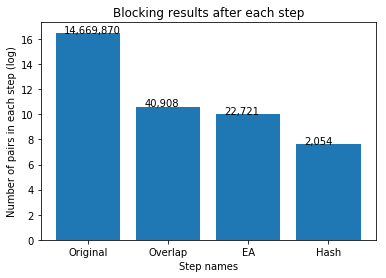

In [36]:
plt.bar([1,2,3,4],[np.log(4717*3110),np.log(40908), np.log(22721),np.log(2054) ]);
plt.ylabel("Number of pairs in each step (log)");
plt.xlabel("Step names");
plt.xticks([1,2,3,4],["Original","Overlap","EA","Hash"]);
plt.title("Blocking results after each step");
plt.text(0.7,np.log(4717*3110),"14,669,870");
plt.text(1.7,np.log(40908),"40,908");
plt.text(2.7,np.log(22721),"22,721");
plt.text(3.7,np.log(2054),"2,054");

The blocking power is: 1-2054/14669870 = 99.99%